# Support Vector Machines and Kernels

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [1]:
from __future__ import print_function
import os
#Please set the path below as per your system data folder location
#data_path = ['..', 'data']
data_path = ['data']

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [2]:
import pandas as pd
import numpy as np

filepath = 'https://raw.githubusercontent.com/yoel2000/Computational-learning/main/Data/Wine_Quality_Data.csv'
data = pd.read_csv(filepath, sep=',')

In [6]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
data.head

<bound method NDFrame.head of       fixed_acidity  volatile_acidity  citric_acid  ...  alcohol  quality  color
0               7.4              0.70         0.00  ...      9.4        5    red
1               7.8              0.88         0.00  ...      9.8        5    red
2               7.8              0.76         0.04  ...      9.8        5    red
3              11.2              0.28         0.56  ...      9.8        6    red
4               7.4              0.70         0.00  ...      9.4        5    red
...             ...               ...          ...  ...      ...      ...    ...
6492            6.2              0.21         0.29  ...     11.2        6  white
6493            6.6              0.32         0.36  ...      9.6        5  white
6494            6.5              0.24         0.19  ...      9.4        6  white
6495            5.5              0.29         0.30  ...     12.8        7  white
6496            6.0              0.21         0.38  ...     11.8        6  whit

In [3]:
y = (data['color'] == 'red').astype(int)
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int64



> If the color of the wine is red, as we convert the value to 1. Else, to 0.



In [4]:
fields = list(data.columns[:-1])  # everything except "color"
fields

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64



> We want to see what is the relation between all the input's features to the output feature.
If the value is equal to 0, as there isn't relation between the two variables.
If the value is postivie, as both variables change in the same direction.
Else, the variables change in opposite directions.



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

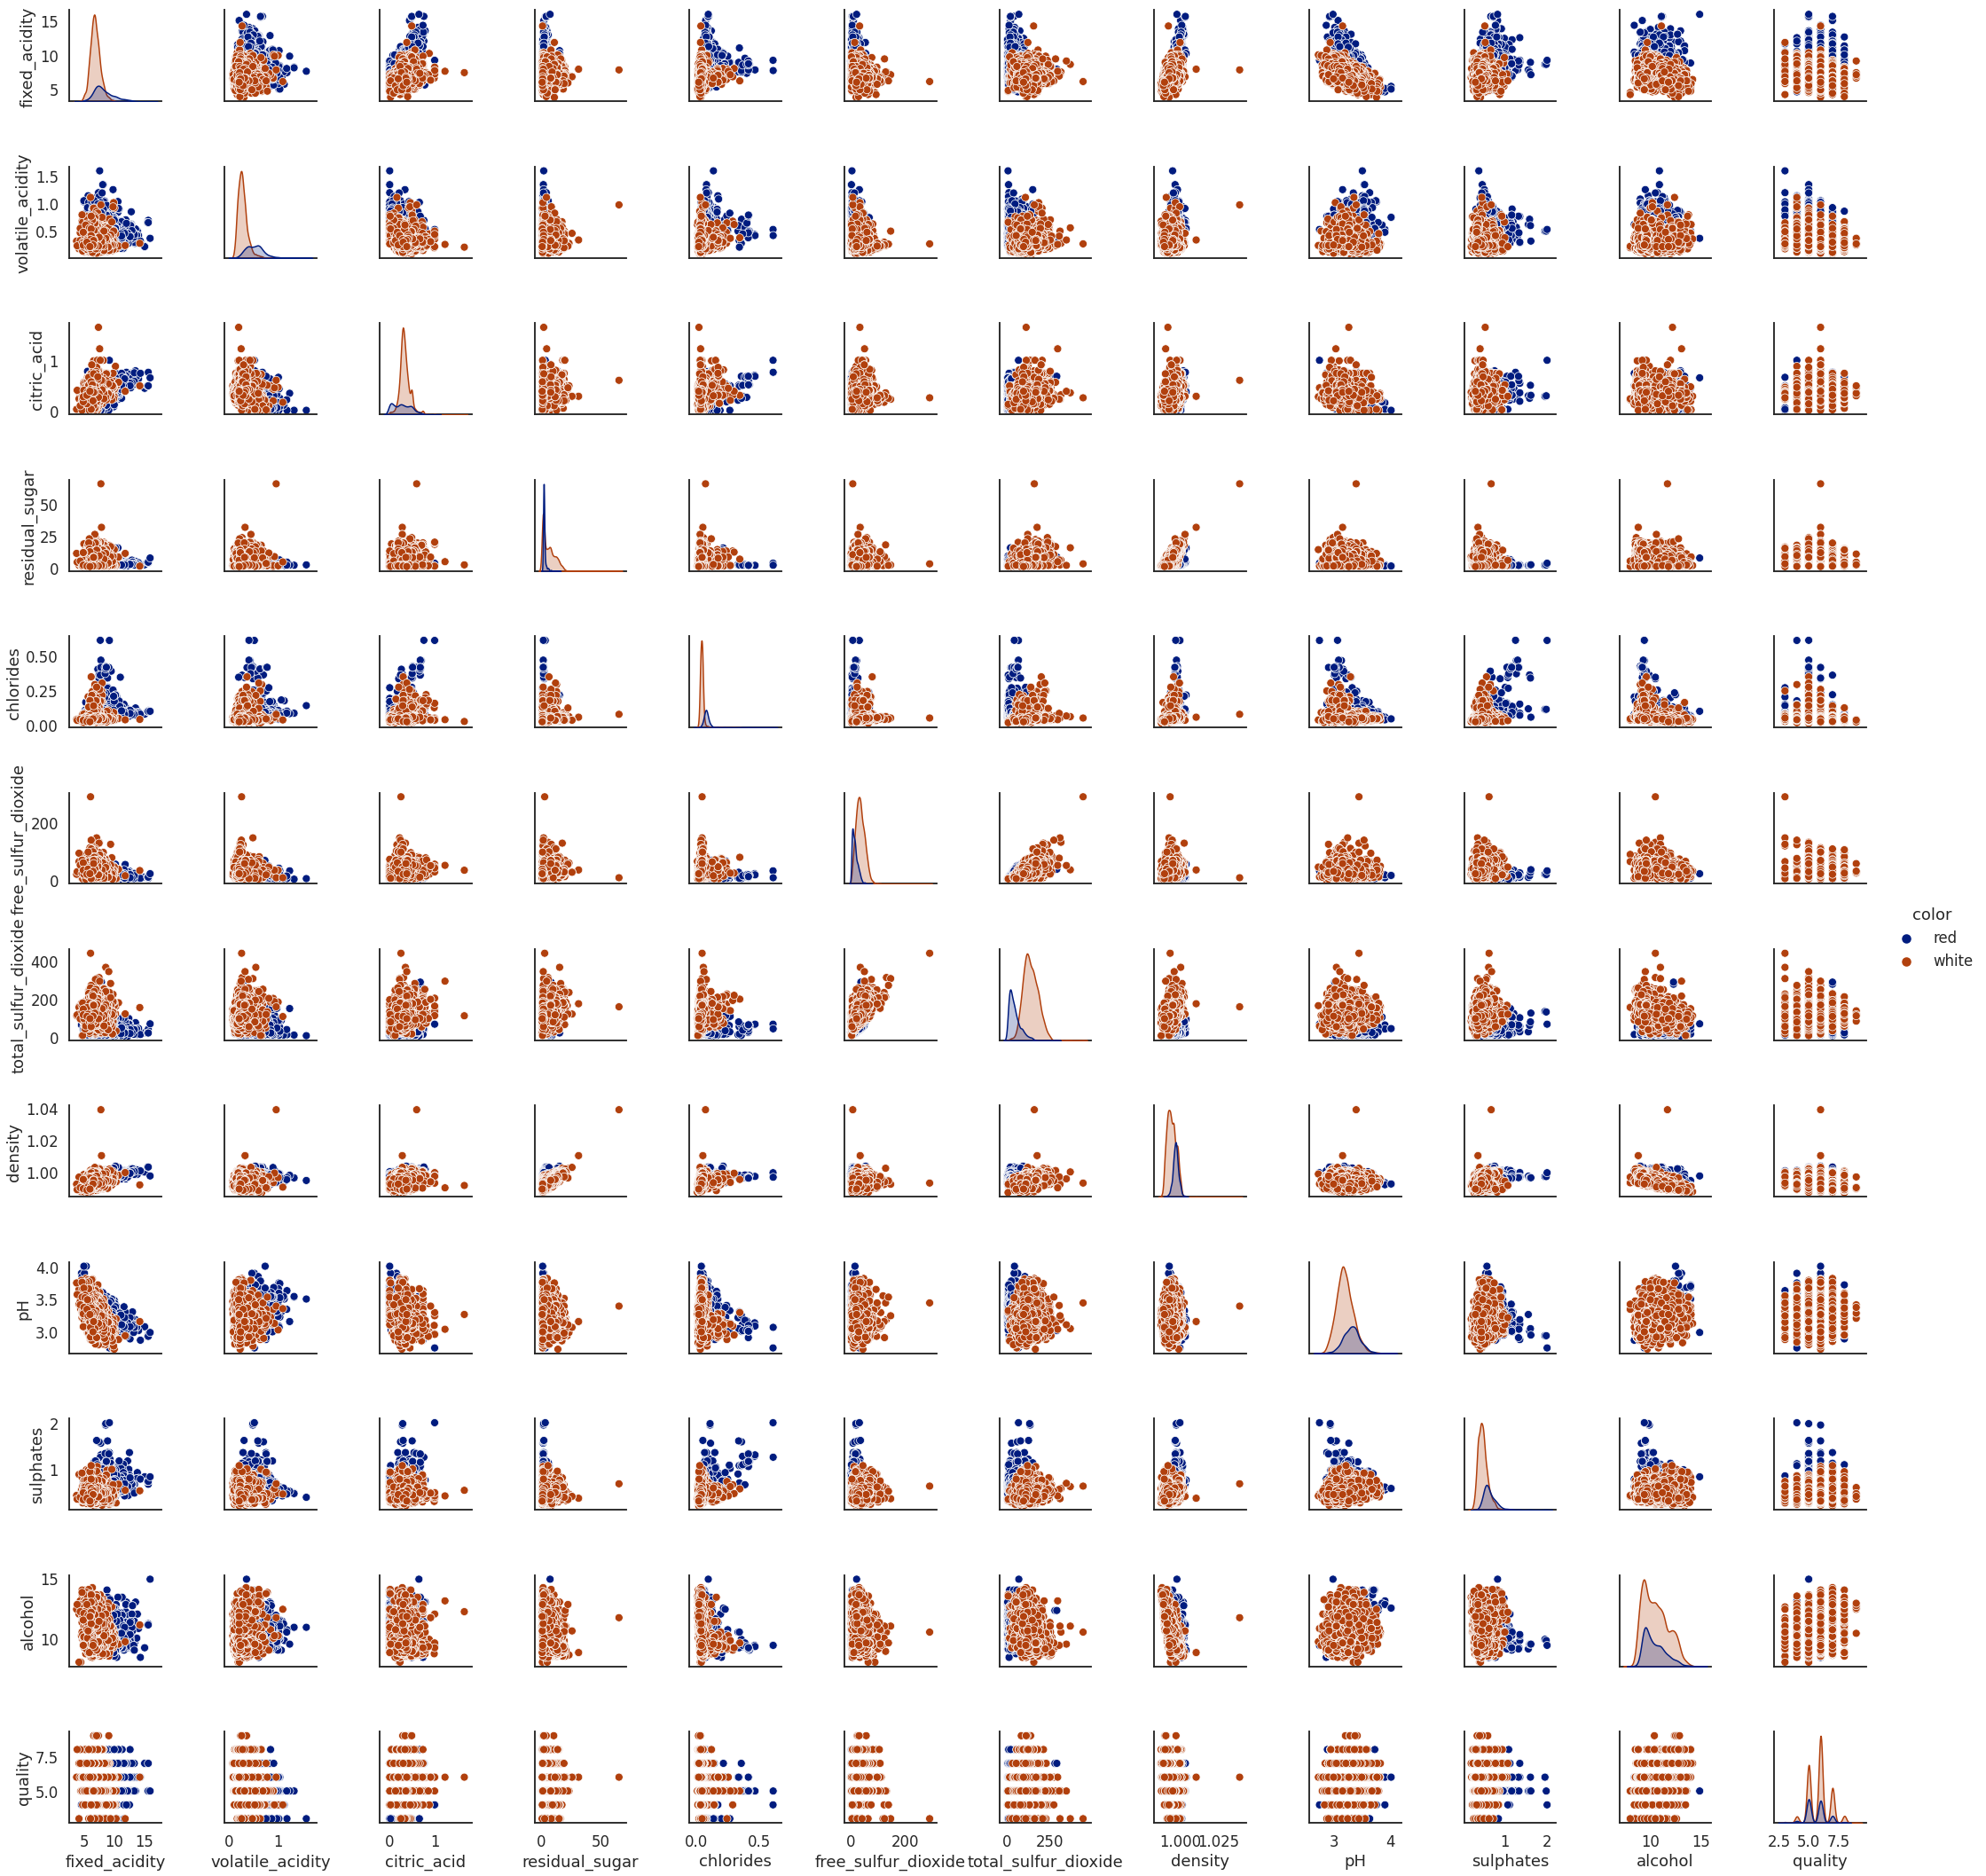

In [12]:
#Warning: takes a long time!!!!!
sns.pairplot(data, hue='color')

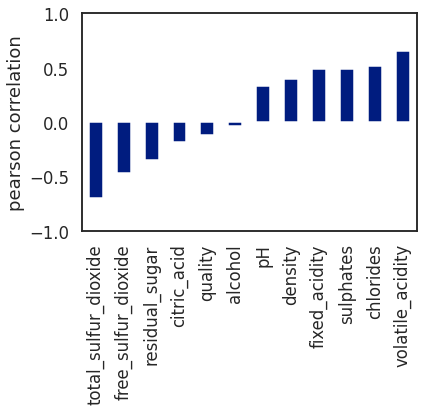

In [7]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [8]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')




> The variable "fields" has the 2 inputs that has the most absolute correlation.



In [15]:
print(X)

      volatile_acidity_scaled  total_sulfur_dioxide_scaled
0                    0.413333                     0.064516
1                    0.533333                     0.140553
2                    0.453333                     0.110599
3                    0.133333                     0.124424
4                    0.413333                     0.064516
...                       ...                          ...
6492                 0.086667                     0.198157
6493                 0.160000                     0.373272
6494                 0.106667                     0.241935
6495                 0.140000                     0.239631
6496                 0.086667                     0.211982

[6497 rows x 2 columns]


## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


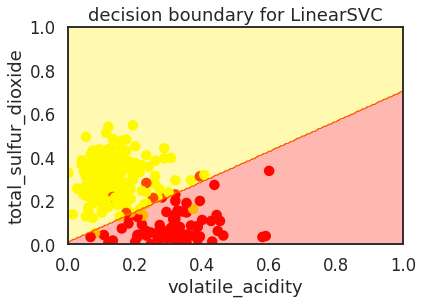

In [9]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45) # Random_state is used to set the seed 
# for the random generator so that we can ensure that the results that we get can be reproduced.
# print(X_color)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');



> We did a SVM analysis according to the 2 parameters with the most correlations and predict according to that whether we have red wine or white wine.



## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [10]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


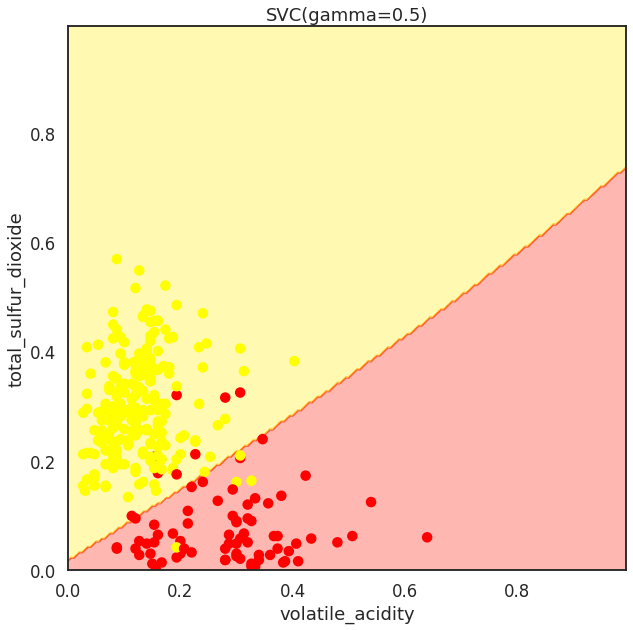

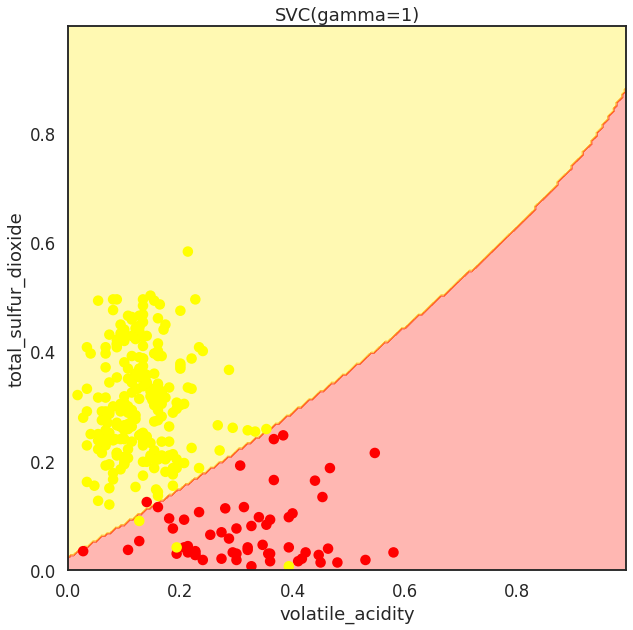

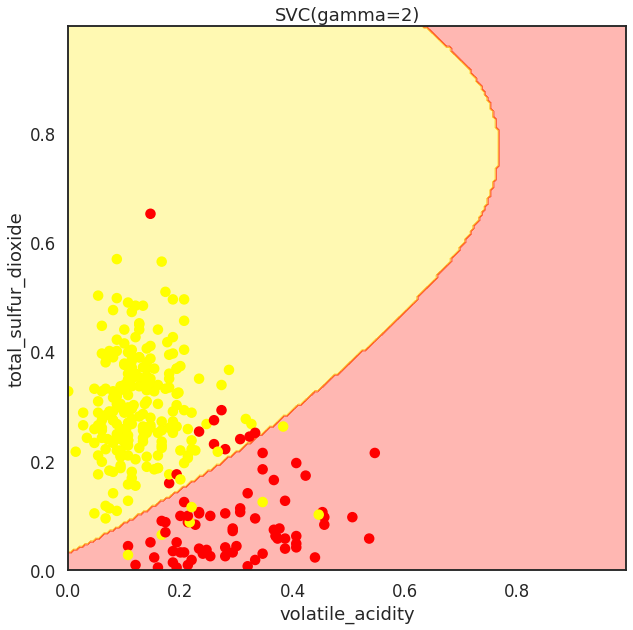

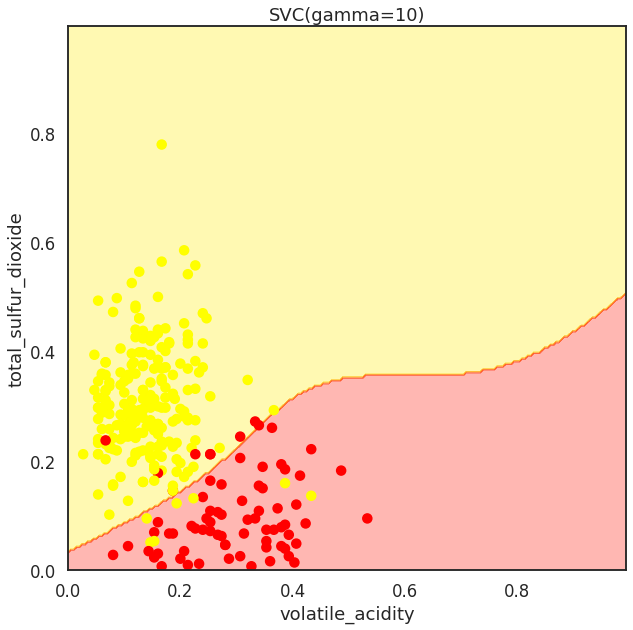

In [11]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)



> The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


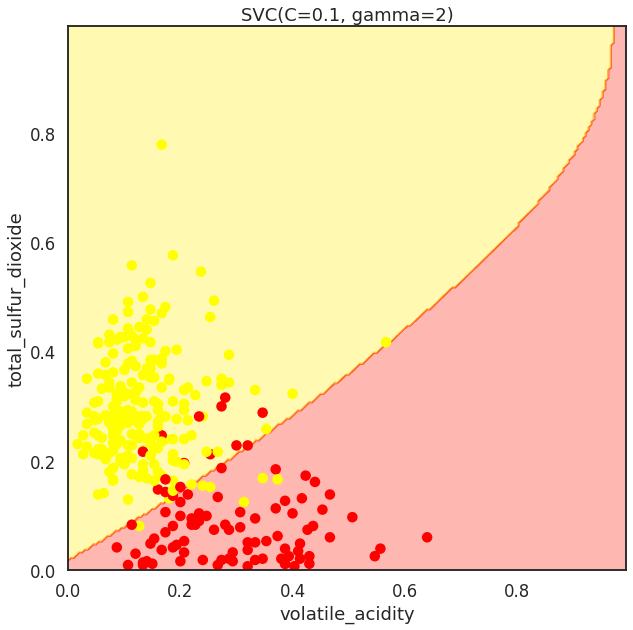

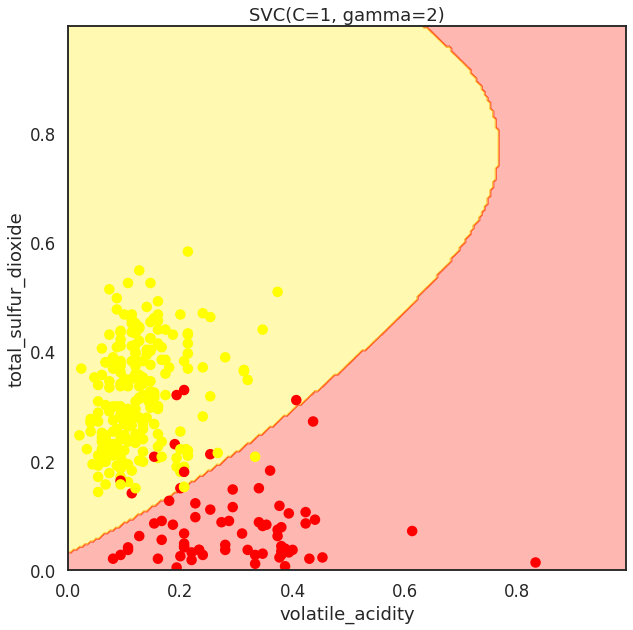

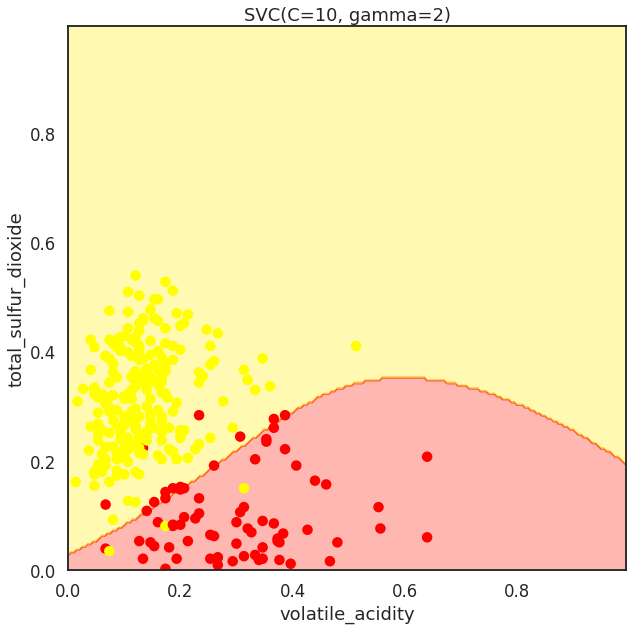

In [12]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)



> For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.



## Question 3A

Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.

* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC
* For various values of `C`, plot the decision boundary. You may try  
`Cs = [10,20,100,200]`
* Try to find out a C value that gives the best possible decision boundary

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


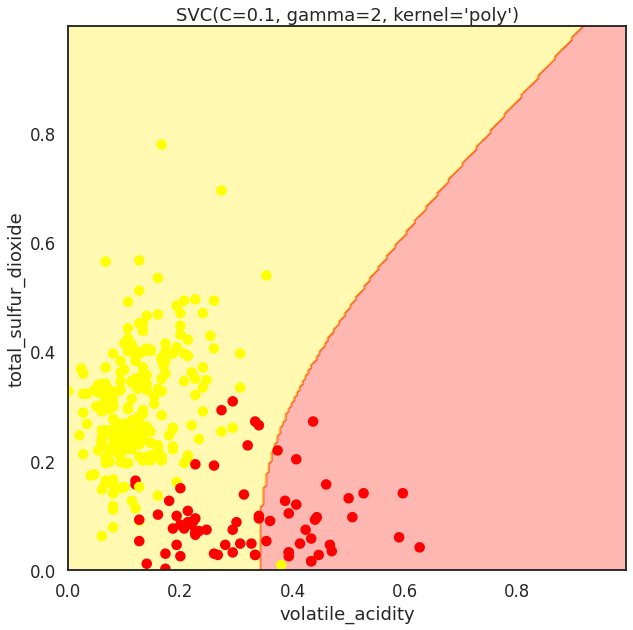

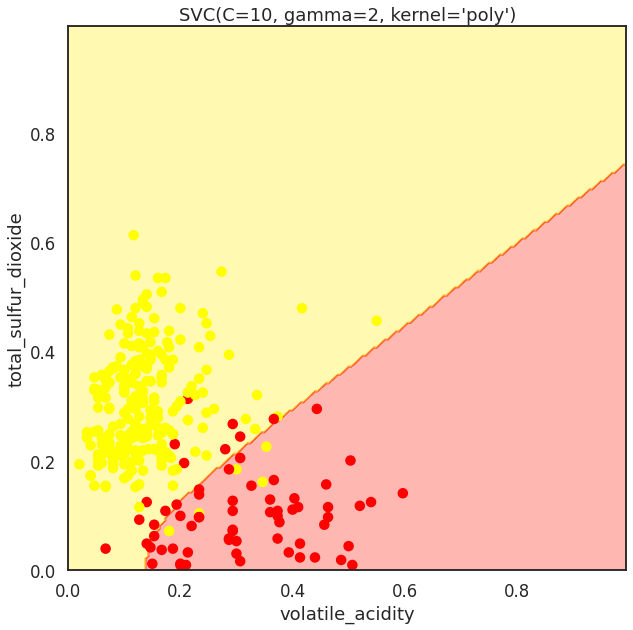

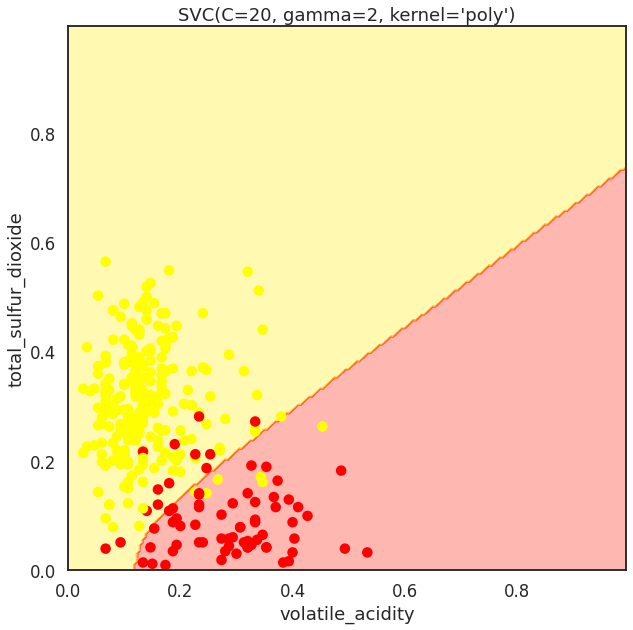

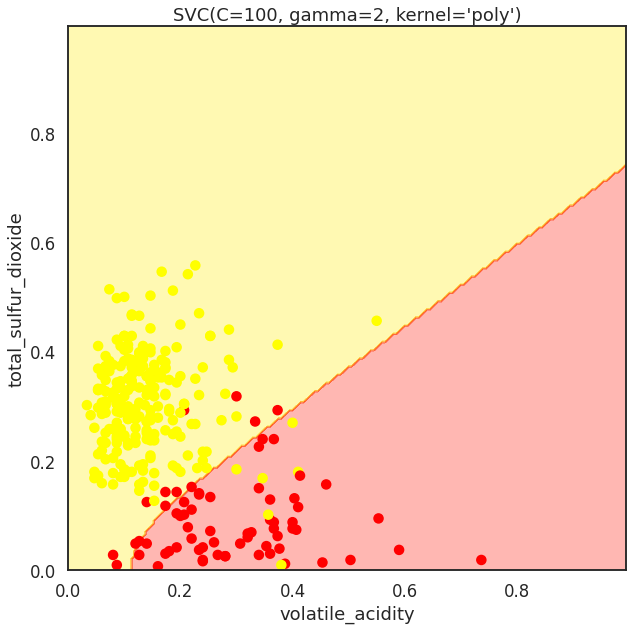

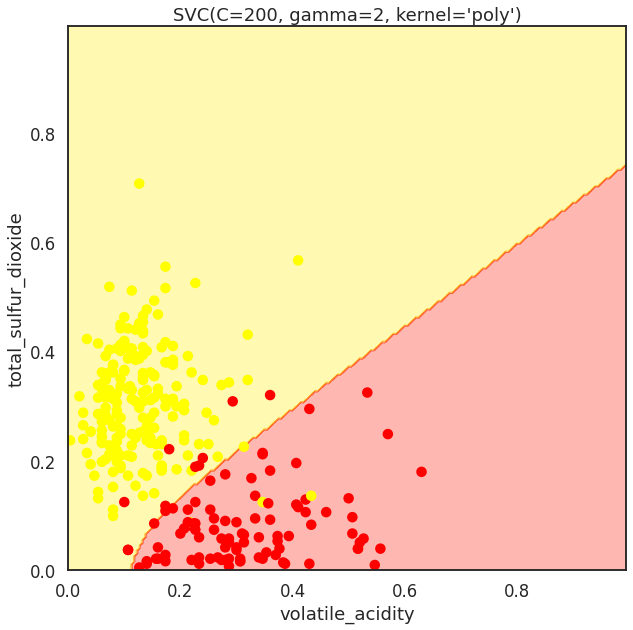

In [13]:
Cs = [0.1, 10, 20, 100, 200]
for C in Cs:
    SVC_Gaussian_poly = SVC(kernel='poly', gamma=2, C=C) # the default degree is 3.
    plot_decision_boundary(SVC_Gaussian_poly, X, y)

> When the C is high, it gives the best decision boundary. 


## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above



> Nystroem approximate a kernel map using a subset of the training data



In [14]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [15]:
%%timeit
svc.fit(X, y)

1 loop, best of 5: 541 ms per loop


In [16]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

1 loop, best of 5: 170 ms per loop


In [17]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [18]:
%timeit svc.fit(X2, y2)

1 loop, best of 5: 12.8 s per loop


In [19]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

1 loop, best of 5: 531 ms per loop








> We see without surprise that when we only use part of the dataset (with Nystroem) that the fit takes much less time.







## Question 5
Try Tuning hyper-parameters for the svm kernal using GridSearchCV

* Take the complete dataset
* Define y as data.color = 'red'
* Remaining columns as X
* Do a test and train split
* Set parameters for cross validation. Do this for as many values of gamma and C
* Using gridsearchcv to run through the data using the various parameters values
* Get the mean and standard deviation on the set for the various combination of gamma and C values
* print the best parameters in the training set

In [27]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit


y = data.color == 'red'
X = data[data.columns[:-1]]

# strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42) # n_splits: number of splitting iterations in the cross-validator

# X_train, Y_train = next(strat_shuf_split.split(X, y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)

(4352, 12)
(1950,)


In [61]:
params = [{'C': [0.01, 0.1, 1, 10,50, 80, 90, 100, 150, 500],
         'gamma': [0.05, 0.1, 0.2, 1, 10, 50]}]

In [62]:
gscv = GridSearchCV(estimator=SVC(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=3)

In [63]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 50, 80, 90, 100, 150, 500],
                          'gamma': [0.05, 0.1, 0.2, 1, 10, 50]}],
             scoring='accuracy')

gsc

In [65]:
gscv.score(X_train, y_train)

0.9983915441176471

In [66]:
gscv.best_params_

{'C': 10, 'gamma': 0.05}

## Question 6
   Use the model from previous question to predict 
 
 * Perform the prediction on the test set  
 * Print confusion matrix, accuracy and classification report

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [68]:
svc = svm.SVC(C=10, gamma=0.05) # with best params
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[1546,   42],
       [  64,  493]])



> These are the best coefficients that I have found but they are not necessarily the best that can exist



In [69]:
accuracy_score(y_test, y_pred)

0.9505827505827505

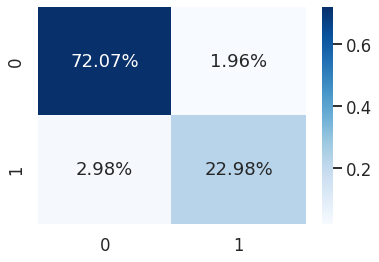

In [70]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [75]:
from sklearn.metrics import f1_score, recall_score

f1_score(y_test, y_pred)

0.9029304029304028

In [76]:
recall_score(y_test, y_pred)

0.8850987432675045

In [78]:
from sklearn.metrics import classification_report

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.96      0.97      0.97      1588\n        True       0.92      0.89      0.90       557\n\n    accuracy                           0.95      2145\n   macro avg       0.94      0.93      0.93      2145\nweighted avg       0.95      0.95      0.95      2145\n'